# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [275]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [276]:
from IPython.core.pylabtools import figsize
from IPython import get_ipython

# %matplotlib inline

figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [277]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                          "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [278]:
# Sua análise da parte 1 começa aqui.
dataframe.head()

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


In [279]:
dataframe.describe()

,normal,binomial
count,10000.000000,10000.000000
mean,19.991456,20.097000
std,4.013850,4.041191
min,4.310399,6.000000
25%,17.309638,17.000000
50%,19.989620,20.000000
75%,22.684324,23.000000
max,35.704951,36.000000


As duas variáveis são numéricas, a normal contínua e a binomial discreta, que apresentam distribuições muito semelhanttes.

A variável `normal` tem distribuição $X \sim \mathcal{N}{(\mu=20, \sigma^2=4)}$.

A variável `binomial` tem distribuição $X \sim \mathcal{b}{(n=100, p=0.2)}$

### Questão 1

O boxplot abaixo demonstra claramente, considerando seus quartis, que as duas distribuições são muiti similares.

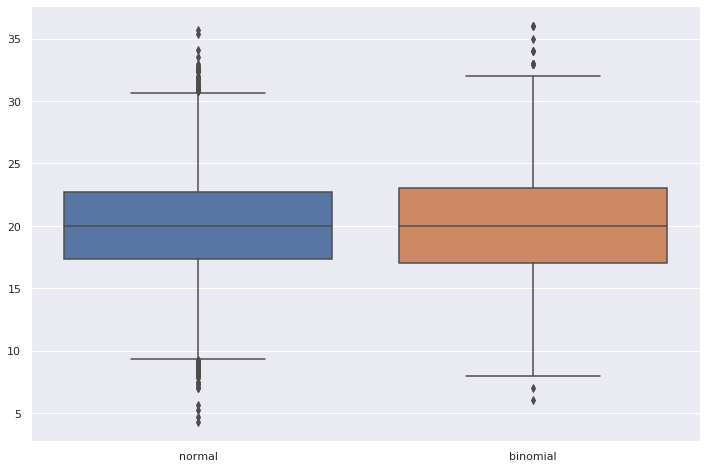

In [280]:
sns.boxplot(data=dataframe);

In [281]:
quartis = [.25, .5, .75]
results = dataframe["normal"].quantile(quartis) - dataframe["binomial"].quantile(quartis)
tuple(results.round(3))

(0.31, -0.01, -0.316)

O exercício sugere refletir se eu esparava valores dessa magnitude, na diferença entre os quartir.

Particularmente, sim, dada que as duas distribuições são muito parecidas. As estatísticas descritivas demonstraram como o centro das distribuições e suas variações são parecidas, o que é confirmado pelo boxplot acima. Então, as diferenças nos seus quartis não deveria ser realmente grande.

Além disso, o exercíciio pergunta se posso explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

Esta pergunta pode ser respondida aproximando a distribuição binomial pela normal. 

Sabemos que uma das propriedades da binomial é que $E(X) = np$ e que uma das propriedades da normal é que $E(X) = \mu$. Portanto,

$\mu = np = 100 \times 0.2 = 20$

Também sabemos que uma outra propriedade da binomial é que $Var(X) = n p (1–p)$ e que $Var(X) = \sqrt{\sigma} = \sigma^2$. Portanto,

$\sigma^2 = \sqrt{100 \times 0.2 \times (1 – 0.2)} = \sqrt{20 \times 0.8} = \sqrt{16} = 4$

O resultado da aproximação da variável `binomial` pela distribuição normal resulta na mesma distribuição da variável `normal`:

$X \sim \mathcal{N}{(\mu=20, \sigma^2=4)}$

E, assim, podemos dizer que:

$X \sim \mathcal{b}{(n=100, p=0.2)} \approx X \sim \mathcal{N}{(\mu=20, \sigma^2=4)}$


### Questão 2

O problema solicita o cálculo da probabilidade do intervalo de um desvio padrão da média $\mu \pm \sigma^2$, ou $[\bar{x} - s, \bar{x} + s]$

In [282]:
def std_prob(x, scale=1):
    mu = x.mean()
    s = x.std()
    inferior = mu - s * scale
    superior = mu + s * scale
    intervalo = np.array([inferior, superior])
    ecdf = ECDF(x)
    limites = ecdf(intervalo)
    return (limites[1] - limites[0]).round(3).item()

In [283]:
std_prob(dataframe["normal"])

0.684

Considerando a regra de aproximação 68-95-99.7%, pela qual o intervalo de um desvio padrão da média comporta aproximadamente 68% da área sob a curva de densidade de probabilidade, o resultado de 0.683 é compatível com a esperança teórica.

Podemos reutilizar a função `std_prob()` para calcular a probabilidade para dois e três desvios padrões da média e confirmar que o resultado corresponderá aproximadamente à regra 68-95-99.7.

Para $[\bar{x} - 2s, \bar{x} + 2s]$

In [284]:
std_prob(dataframe["normal"], 2)

0.954

E para $[\bar{x} - 3s, \bar{x} + 3s]$

In [285]:
std_prob(dataframe["normal"], 3)

0.997

### Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

In [286]:
# Calcuar média e variância de normal
m_norm = dataframe["normal"].mean()
v_norm = dataframe["normal"].var()

# Calcuar média e variância de binomial
m_binom = dataframe["binomial"].mean()
v_binom = dataframe["binomial"].var()

# Calcular diferenças
results = np.array([m_binom-m_norm, v_binom-v_norm])

tuple(results.round(3))

(0.106, 0.22)

A primeira reflexão proposta neste problema é se os valores dessa magnitude eram esperados. Na verdade, sim. Vimos no anterior que as duas variáveis possuem distribuição semelhante, de modo que seus parâmatros normais são muito próximos. Assim, a diferença entre as médias e as variâncias deveriam resultar pequenas.

A segunda reflexão nos pergunta o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`.

Para fazer esta verificação vamos comparar as distribuições originais com outras duas binomiais com $n=50$ e $n=150$:

In [287]:
np.random.seed(42)
dataframe["binomial50"] = sct.binom.rvs(150, 0.2, size=10000)
dataframe["binomial150"] = sct.binom.rvs(50, 0.2, size=10000)

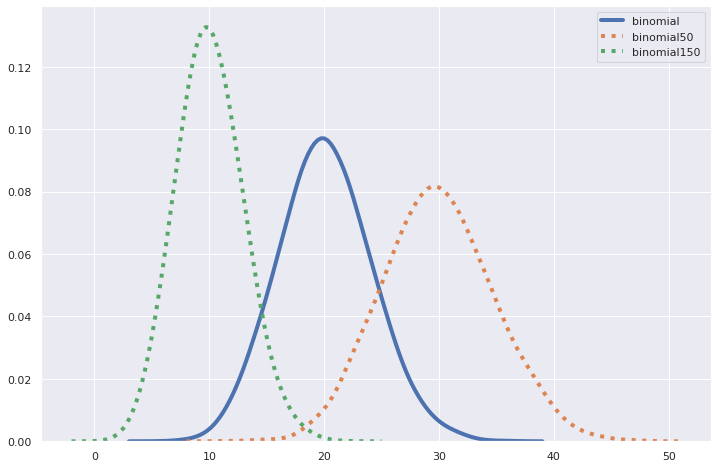

In [288]:
for x, style in zip(dataframe.iloc[:, 1:], ["-", ":", ":"]):
    sns.kdeplot(dataframe[x], legend=True, bw=1, linewidth=4, linestyle=style);

A visualização demonstra que o efeito é a mudança da média e da variância da distribuição binomial.

Com um $n=50$, alteramos a relação dos parâmetros em $E(X) = np$, assim como em $Var(X) = np(1-p)$ da binomial, aumentando média $\bar{x}$ e a variância $Var(x)$. Assim, a curva se posiciona mais à direita e e a variabilidade é maior.

Com um $n=150$ ocorre o inverso. Os valores de $\bar{x}$ e de $Var(x)$ caem, de modo que a curva se posiciona mais à esquerda e tem menor variabilidade, resultando em valores concentrados mais próximos da média.

A diferença pode ser observada na tabela abaixo:

In [289]:
pd.DataFrame([dataframe.mean()[1:], dataframe.var()[1:]], index=["média", "variância"])

,binomial,binomial50,binomial150
média,20.097000,29.898500,10.045700
variância,16.331224,23.584556,8.123224


Para computar as diferenças das médias e variâncias de `binomial50` e `binomial150` em relação às de `binomial` criarei uma função.

In [290]:
def param_diff(normal_mean, normal_std, binom_prop, binom_n):
    np.random.seed(42)
    data = pd.DataFrame({"normal": sct.norm.rvs(normal_mean, normal_std, size=10000),
                         "binomial": sct.binom.rvs(binom_n, binom_prop, size=10000)})
    m_binom = data["normal"].mean()
    m_normal = data["binomial"].mean()
    v_binom = data["normal"].var()
    v_normal = data["binomial"].var()
    results = np.array([m_normal-m_binom, v_normal-v_binom]).round(3)
    return tuple(results)

Pronto, se eu rodar agora a função usando os mesmos parâmetros passados anteriormente na criação da amostra, os resultados serão os mesmos.

In [291]:
param_diff(20, 4, .2, 100)

(0.106, 0.22)

Vejamos agora o que acontece com $n=50$.

In [292]:
param_diff(20, 4, .2, 110)

(2.109, 1.727)

E com $n=150$.

In [293]:
param_diff(20, 4, .2, 90)

(-1.898, -1.464)

## Resolução dos exercícios

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [294]:
def q1():
    quartis = [.25, .5, .75]
    resultados = dataframe["normal"].quantile(quartis) - dataframe["binomial"].quantile(quartis)
    return tuple(resultados.round(3))

In [295]:
q1()

(0.31, -0.01, -0.316)

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [296]:
def q2():
    return std_prob(dataframe["normal"])

In [297]:
q2()

0.684

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [298]:
def q3():
    m_binom = dataframe["normal"].mean()
    m_normal = dataframe["binomial"].mean()
    v_binom = dataframe["normal"].var()
    v_normal = dataframe["binomial"].var()
    results = np.array([m_normal-m_binom, v_normal-v_binom]).round(3)
    return tuple(results)

In [299]:
q3()

(0.106, 0.22)

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [300]:
import os

if not os.path.exists("data"):
    os.makedirs("data")

if not os.path.exists("HTRU2.zip"):
    import urllib.request
    import zipfile
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip"
    nome_arquivo = "HTRU2.zip"
    urllib.request.urlretrieve(url, nome_arquivo)
    zip_ref = zipfile.ZipFile(nome_arquivo, 'r')
    zip_ref.extractall("data")
    zip_ref.close()

In [301]:
stars = pd.read_csv("data/HTRU_2.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [302]:
stars.shape

(17897, 9)

In [303]:
stars.dtypes

mean_profile    float64
sd_profile      float64
kurt_profile    float64
skew_profile    float64
mean_curve      float64
sd_curve        float64
kurt_curve      float64
skew_curve      float64
target             bool
dtype: object

In [304]:
# Sua análise da parte 2 começa aqui.
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


In [305]:
stars.describe()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837


In [306]:
stars["target"].mean()

0.09157959434542103

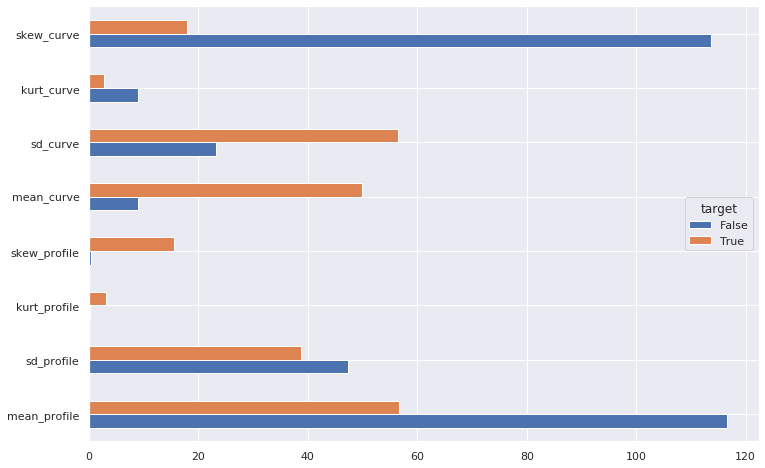

In [307]:
stars.groupby("target").mean().T.plot.barh();

### Questão 4

O problema é descobrir as probabilidades acumuladas empíricas da variável `false_pulsar_mean_profile_standardized`, associadas aos quantis teóricos de uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95.

In [308]:
# padronizar a variável mean_profile
mean_profile = stars["mean_profile"][stars["target"] == 0]
false_pulsar_mean_profile_standardized = sct.zscore(mean_profile)
false_pulsar_mean_profile_standardized

array([-0.80420618, -0.77514667,  1.15529864, ...,  0.15878113,
       -0.11750771, -3.40480839])

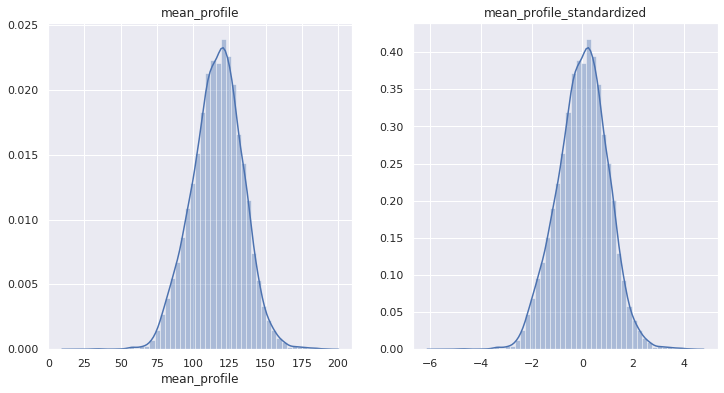

In [309]:
# visualizar as distribuições
f, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.distplot(stars["mean_profile"][stars["target"] == 0], ax=axes[0])
sns.distplot(false_pulsar_mean_profile_standardized, ax=axes[1])

axes[0].set_title("mean_profile")
axes[1].set_title("mean_profile_standardized");

Como pode ser verificado acima, a variável padronizada têm distribuição idêntica a `mean_profile`, mas com média 0 e desvio padrão 1.

Agora eu vou computar o cálculo necessário.

In [310]:
# encontrar os quantis teóricos para [.8, .9, .95]
quantis_teoricos = sct.norm.ppf([.8, .9, .95], 0, 1)
# imprimir quantis
print(f"quantis teóricos: {quantis_teoricos.round(3)}")

# criar ecdf para a variável padronizada
ecdf = ECDF(false_pulsar_mean_profile_standardized)

# encontrar a probabilidade acumulada dos quantis teóricos
resultados = ecdf(quantis_teoricos)

# imprimir resultados como tupple, arredondando para 3 casas decimais
print(f"resultados: {tuple(resultados.round(3))}")

quantis teóricos: [0.842 1.282 1.645]
resultados: (0.806, 0.911, 0.959)


A primeira reflexão é se os valores encontrados fazem sentido, já que as probabilidades são aproximadamente as mesmas das que foram usadas para gerar os quantis teóricos. É preciso considerar que o que fizemos acima foram dois procedimentos inversos: encontrar os quantis teóricos em uma distribuição normal teórica a partir de uma lista de probabilidades $[.8, .9, .95]$; e encontrar as probabilidades $(0.806, 0.911, 0.959)$ em outra distribuição teórica (`mean_profile` após padronização Z) a partir dos quantis encontrados anteriormente.

Portanto, os resultados fazem sentido.

Além disso, o problema nos pergunta o que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`. E isto já está basicamente respondido acima. Isto é, ela corresponde à uma distribuição normal teórica, com $\bar{x}=0$ e $s=1$.

### Questão 5

A questão é calcular a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized`, criado no exercício anterior, e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1.

In [311]:
# Encontrar quantis associados a Q1, Q2 e Q3
quartis = [.25, .5, .75]
quantis_empiricos = np.quantile(false_pulsar_mean_profile_standardized, quartis)
print(f"Quantis empíricos: {quantis_empiricos}")

# Encontrar os quantis teóricos associados a Q1, Q2 e Q3
quantis_teoricos = sct.norm.ppf(quartis, 0, 1)
print(f"Quantis teóricos: {quantis_teoricos}")

# Calcular a diferença
resultado = quantis_empiricos - quantis_teoricos

# Imprimir como tuple arredondando para 3 casas decimais
print(f"Diferenças: {tuple(resultado.round(3))}")

Quantis empíricos: [-0.64717308  0.03986069  0.6706755 ]
Quantis teóricos: [-0.67448975  0.          0.67448975]
Diferenças: (0.027, 0.04, -0.004)


As diferenças são praticamente nulas.

Os resultados novamente fazem sentido. Como vimos anteriormente, a distribuição da variável `false_pulsar_mean_profile_standardized` corresponde a uma distribuição normal teórica, com $\bar{x}=0$ e $s=1$.

In [312]:
print(false_pulsar_mean_profile_standardized.mean().round())
print(false_pulsar_mean_profile_standardized.var().round())

0.0
1.0


De tal maneira, seus quantis não devem ser muito diferentes dos quantis encontrados por `sct.norm.ppf(quartis, 0, 1)`, que é baseado numa distribuição também com $\bar{x}=0$ e $s=1$.

Novamente o problema pergunta o que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`. A resposta é a mesma da anterior: ela corresponde à uma distribuição normal teórica $\mathcal{N} \sim (\mu=0, \sigma^2=1)$.

## Resolução dos exercícios

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [313]:
def q4():
    ecdf = ECDF(false_pulsar_mean_profile_standardized)
    quantis_teoricos = sct.norm.ppf([.8, .9, .95], 0, 1)
    resultados = ecdf(quantis_teoricos)
    return tuple(resultados.round(3))

In [314]:
q4()

(0.806, 0.911, 0.959)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [315]:
def q5():
    quartis = [.25, .5, .75]
    quantis_empiricos = np.quantile(false_pulsar_mean_profile_standardized, quartis)
    quantis_teoricos = sct.norm.ppf(quartis, 0, 1)
    resultado = quantis_empiricos - quantis_teoricos
    return tuple(resultado.round(3))

In [316]:
q5()

(0.027, 0.04, -0.004)